# Dynamic Programming (2)

## 서열 정렬 (Sequence Alignment)
어느 DNA가 다른 DNA로 변형되는데 얼마나 많은 변이가 필요한가를 계산하는 문제
* 변이 : **삽입**, **삭제**, **대체** 연산
* 편집 거리(**Edit Distance**) : 문자열 S를 T로 변환시키는데 필요한 **최소의 편집 연산 횟수**

### 작은 것부터 해결하기
* 작은 문제 (부분 문제)들이 무엇인가?
* S와 T각각의 prefix에 대해 미리 계산했다면, 나머지 부분에 대해서도 계산 가능
> S = s1, s2, s3, ...  
> T = t1, t2, t3, ...  
* 부분 문제 E[i, j] : S의 앞 i개 문자를 T의 앞 j개 문자로 변환시키는 데 필요한 최소 연산 횟수

#### [예]S = 'script', T = 'scope'
* E[4,3] = 'scri'를 'sco'로 바꾸기 위한 편집 거리를 찾고
* E[6,5]를 해결하여 문제의 해를 찾는다.

* 테이블 초기화

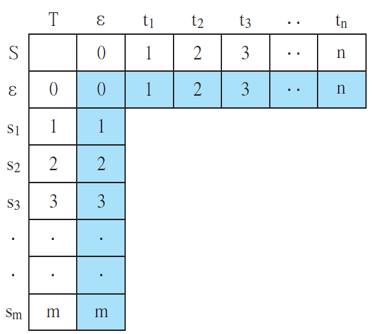

* 0번째 행 초기화 : 초기에 S에 아무런 문자도 없을 때 T의 각 문자를 차례로 삽입하는 데 필요한 연산 수. 삽입연산 : 오른쪽 +1
* 0번째 열 초기화 : S의 각 문자를 차례로 삭제하여 T에 아무 문자도 없는 상태를 만드는 데 필요한 각각의 연산 수. 삭제연산 : 아래 +1
* 대체 연산 : 대각선 + a(다르면 1, 같으면 0)

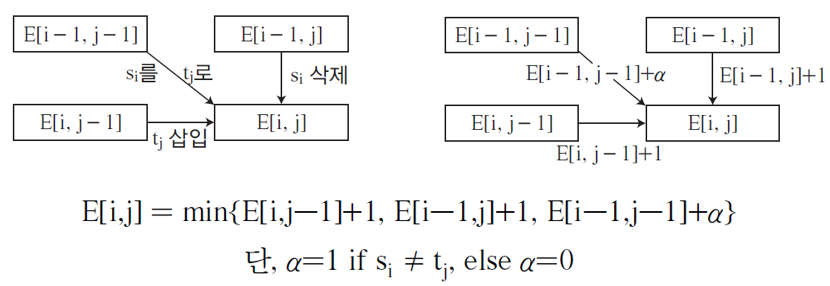

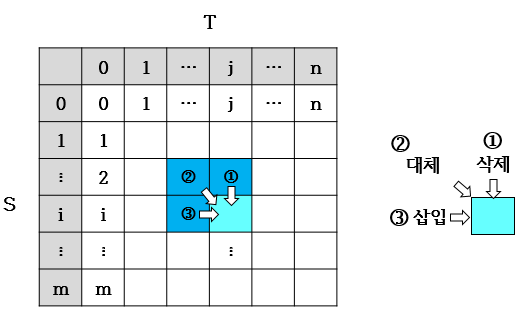

### 편집 거리 알고리즘


1.   2차원 m x n 리스트 E를 첫 번째 행부터 차례로 각 원소에 주변 3개의 해로 계산된 결과 중에서 최솟값을 저장한다.
2.   return E[m, n]

#### 위 예제의 편집 거리 계산


1.   E[1, 1] = min(E[1, 0] + 1, E[0, 1] + 1, E[0, 0] + α) = min((1+1), (1+1), (0+0)) = 0

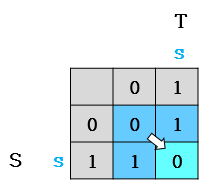

2.   E[2, 2] = min(E[2, 1] + 1, E[1, 2] + 1, E[1, 1] + α) = min((1+1), (1+1), (0+0)) = 0

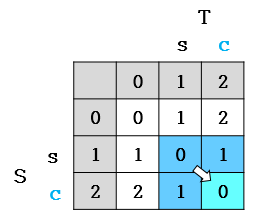  

3. E[3, 2] = min(E[3, 1] + 1, E[2, 3] +1, E[2, 2] + α) = min(2+1, 0+1, 1+1) = 1

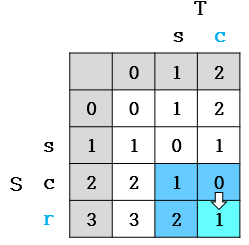





4. E[4, 3] = min(E[4, 2] + 1, E[3, 3] + 1, E[3, 2] + α) = min((2+1), (1+1), (1+1)) = 2
5. E[5, 4] = (계산해 보기)
6. E[6, 5] = (계산해 보기)

In [5]:
# 서열정렬문제 : 편집 거리 알고리즘
# 1. 2차원 m x n 리스트 E를 첫 번째 행부터 차례로 각 원소에 주변 3개의 해로 계산된 결과 중에서 최솟값을 저장한다.
# 2. return E[m, n]

S = 'script'
T = 'scope'
m = len(S)
n = len(T)
E = [[_ for _ in range(n+1)] for _ in range(m+1)]        #편집거리 저장

for i in range(m+1):
    E[i][0] = i         #삭제연산 초기화
for j in range(n+1):
    E[0][j] = j         #삽입연산 초기화

for j in range(1, n+1):
    for i in range(i, m+1):
        if S[i-1] == T[j-1]:
            alpha = 0
        else:
            alpha = 1
        E[i][j] = min(E[i-1][j]+1, E[i][j-1]+1, E[i-1][j-1]+alpha)

print(f'{S} -> {T}의 편집 거리:', E[m][n])


script -> scope의 편집 거리: 5


#### 수행 시간
* 서열 정렬을 위한 알고리즘의 수행 시간은 O(mn)이다.
* m = S의 문자 수, n = T의 문자 수
* 각 부분 문제 E[i, j]의 해는 주변 3개의 해를 이용하여 계산하므로 O(1) 시간 소요
* 총 부분 문제 수: mn

#### 응용
* 생물 정보 공학(Bioinformatics), 생명 공학, 의학 분야에서 유전자 분석
* 특정인의 유전자 속에서 암을 유발하는 유사한 유전자를 찾아내고, 암세포에만 있는 특징을 분석하여 항암제를 개발하는 연구
* 좋은 형질을 가진 유전자 탐색 등의 연구
* 범죄 수사, 친자 확인 등
* 철자 오류 검색
* 광학 문자 인식(OCR)에서의 보정 시스템
* 자연어 번역 소프트웨어 등

## 합이 최대 K되는 숫자



### 구간 스케줄링 문제
 - 각 동아리가 미팅의 시작과 종료 시간을 제시하고 미팅룸은 1개일 때 가장 많은 수의 동아리 미팅을 시간이 겹치지 않도록 스케줄링을 하는 것  

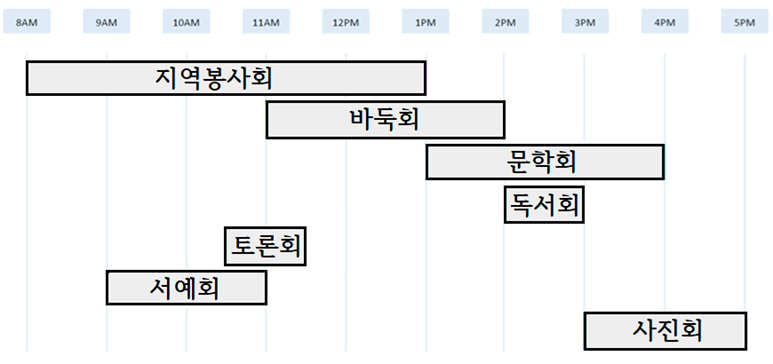

* 각 동아리가 미팅에 필요한 시간만을 제시

[예] 6개의 동아리에서 각각 30분, 40분, 50분, 60분, 95분, 100분 동안 미팅룸을 사용하기를 원한다.   
이때 1개의 미팅룸에 특정 시간 동안(예, 아침 9시부터 오후 1시까지) 가능한 한 미팅룸이 비어 있지 않도록 동아리들을 배정하라.   
단, 이 문제에서는 선택된 동아리 수나 동아리의 미팅 순서는 중요하지 않다.




### 합이 K에 가까운 수 선택
* 위의 예는 {30, 40, 50, 60, 95, 100}에 대해 K = 240일 때, 어떤 숫자들을 선택해야 그 합이 240에 가까운지 찾는 문제와 같다.  
해: 30 + 50 + 60 + 100 = 240

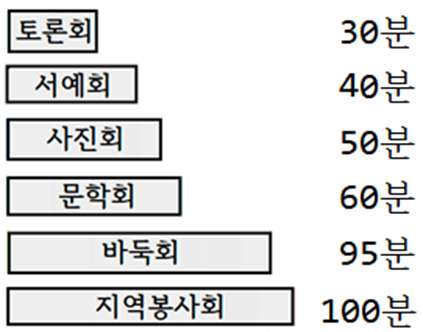

### 합이 최대 K가 되는 숫자 문제 (Subset Sum)
* 최적화 부분 집합의 합(Subset Sum)  
* n개의 숫자에 대해 합이 최대 K가 되는 숫자들을 찾는 문제이다.  
* 주어진 숫자들 중에서 합이 K가 되는 숫자들이 없으면 그 합이 K에 가장 가까운 숫자들을 찾는다.
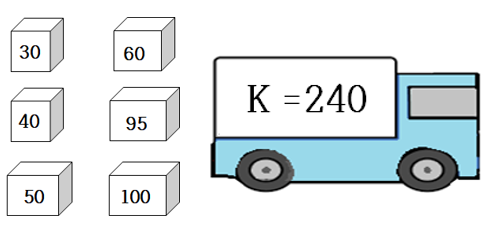

#### 생각해보기
* 작은 것, 부분 문제 만들기!
1. 숫자(물건)를 1개씩 늘려가며 부분 문제의 크기를 증가시킨다.
2. 트럭 용량을 1, 2, 3, …, K로 1씩 증가시킨다.

#### 알고리즘
[1] 물건을 차례로 하나씩 다음과 같은 결정을 내린다:   
> 트럭 용량을 1씩 증가시키며 물건을 트럭에 싣는 것이 유리한지 싣지 않는 것이 나은지 결정한다.

[2] return 마지막 물건에 대해 K일 때의 트럭에 실은 물건의 총량

---

[예제] S = [3, 4, 5, 6], K = 13일 때, 합이 최대 K 되는 숫자 문제를 위한 동적 계획 알고리즘으로 해를 찾아보자.

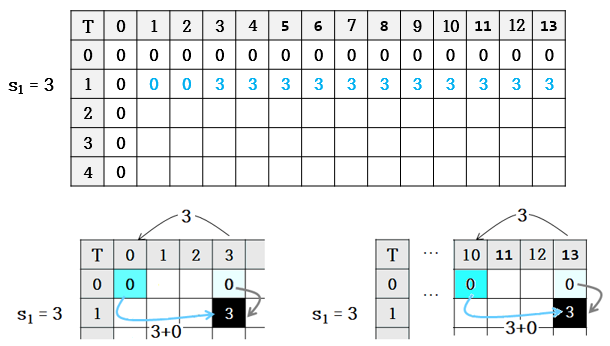

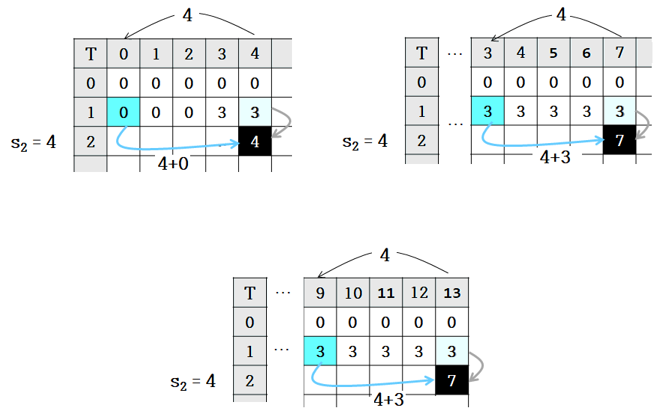

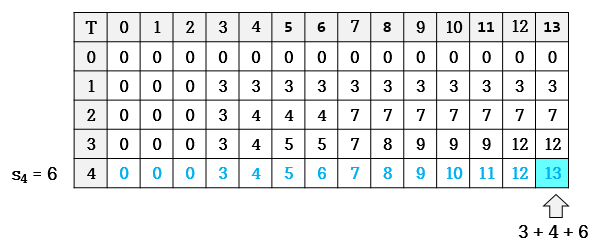

In [10]:
# 합이 최대 K가 되는 숫자 문제

S = [0,30,40,50,60,95,100]
K = 240
n = len(S)-1
T = [[0 for _ in range(K+1)] for _ in range(n+1)]

for i in range(1, n+1):     #S
    for j in range(1, K+1): #K
        if S[i]>j:
            T[i][j] = T[i-1][j]         #S[i]를 트럭에 못 넣음
        else:
            T[i][j] = max(T[i-1][j], S[i]+T[i-1][j-S[i]])   #S[i]포함여부 결정
print(f'T[{n},{K}] = {T[n][K]}')

T[6,240] = 240


#### 수행시간
물건 수가 n이고, 트럭 용량이 K이며 각 계산은 O(1) 시간  
따라서 알고리즘의 수행 시간은 O(nK)이다.


## 배낭 문제(Knapsack)
* n개의 물건이 각각 무게와 가치를 가지고 배낭의 용량 K가 주어질 때 어떤 물건을 배낭에 담아야 최대의 가치를 얻을까?

두 가지 측면에서 부분 문제의 크기를 정한다.

* 배낭 용량
* 물건의 개수

[1] 배낭 용량을 1kg부터 1kg씩 늘려가며 배낭의 최대 용량까지 물건들을 담아본다.

[2] 물건 수의 경우에는 처음엔 물건 1만 고려하고, 그 다음엔 물건 2를 추가해 고려해보고, 또 그 다음엔 물건 3을 추가해 고려해보고, …, 즉 차례로 물건을 하나씩 추가하여 고려하며 배낭에 담아본다.


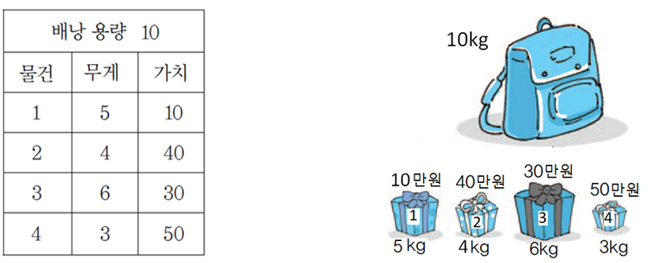

* 먼저 물건 1에 대해서만 배낭 용량을 1kg씩 늘려가면서 어떤 가치를 얻을 수 있는지 살펴보면, 배낭 용량이 1kg, 2kg, 3kg, 4kg일 때에는 물건 1을 배낭에 담을 수 없다. 따라서 각각의 경우에 얻는 가치는 0이다.

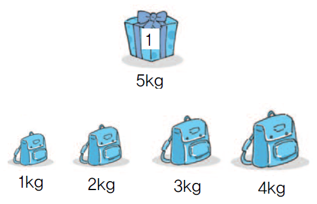

* 용량이 5kg일 때는 물건 1의 무게가 5kg이므로 물건 1을 배낭에 담는다.   
그다음 계속해서 배낭 용량이 10kg이 될 때까지 1kg씩 늘린 경우 일단 물건 1만 고려하므로 각각 10만 원의 가치를 얻는다.

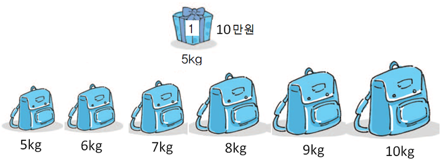

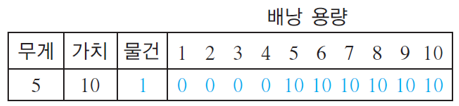

* 다음은 물건 2에 대해, 물건 1에 대한 결과를 이용하여 물건 2를 배낭에 담는 것을 고려해보자.

* 배낭 용량이 1∼ 3kg일 때는 물건 2가 무거워서 배낭에 담을 수 없다.  
참고로 이때 물건 1도 담을 수 없었다.  
각각의 경우 얻는 가치는 0원  
* 배낭 용량이 4kg이면 물건 2를 담을 수 있다.
* 이때 물건 1은 배낭에 담을 수 없었다.  
* 따라서 배낭 용량이 4kg일 때 얻는 가치는 물건 2의 가치인 40만 원



#### 배낭 용량이 5kg이 되면, 물건 1과 2 중에 어느 것을 배낭에 담아야 할까?

다음 두 가지의 경우에 대해 더 큰 가치를 얻을 수 있는 것을 선택한다.  
 [1] 물건 2를 무시하고, 물건 1을 배낭에 남겨두었을 때의 가치   
 [2] 4kg인 물건 2를 담기 위해, (배낭 용량이 1kg일 때의 가치) + (물건 2의 가치)

 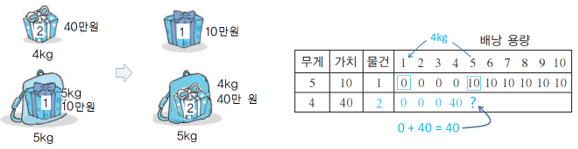

* [1]은 10, [2]는 0 + 40 = 40  
* 따라서 물건 1을 배낭에서 꺼내고 물건 2를 배낭에 담아야 더 큰 가치를 얻는다.
* [주의] 배낭 용량을 5kg에서 1kg로 줄였을 때의 가치가 0이 아닐 수도 있다.

* 그 다음 배낭 용량이 8kg이 될 때까지는 물건 1을 꺼내고 물건 2를 담는 것이 배낭 용량이 5kg일 때와 마찬가지로 더 큰 가치를 얻는다.

* 배낭의 용량이 9kg일 때는 물건 1과 2 모두 배낭에 담을 수 있다.  
* 따라서 이때의 가치는 10 + 40 = 50만 원
* 배낭 용량이 10kg일 때도 가치는 50만 원

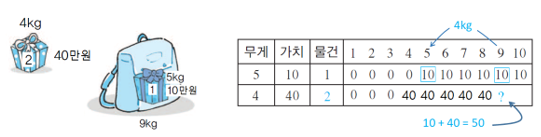

* 물건 3에 대해서 배낭의 용량을 늘려가며 가치를 계산하고,
* 마지막으로 물건 4에 대해서 가치의 계산 결과


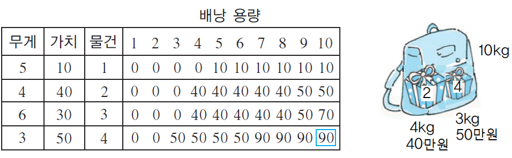

#### 배낭 DP 알고리즘
[1] 물건을 차례로 하나씩 다음과 같은 결정을 내린다:   
배낭의 용량을 1kg씩 증가시키며 물건을 배낭에 담는 것이 유리한지 담지 않는 것이 나은지 결정한다.  
[2] return 마지막 물건에 대해 Kkg일 때 가치


In [13]:
W = [5,4,6,3]
V = [10,40,30,50]   #교재오타
K = 10
n = len(W)
T = [[0 for _ in range(K+1)] for _ in range(n+1)]

for i in range(n):
    for j in range(K+1):
        if W[i] > j:
            T[i][j] = T[i-1][j]
        else:    
            T[i][j] = max(T[i-1][j], V[i]+T[i-1][j-W[i]])

print('최대가치: ', T[n-1][K])       



최대가치:  90


#### 수행시간

각 물건 i에 대해 K 경우를 계산해야 하고, 각 계산은 O(1) 시간  
따라서 알고리즘의 수행 시간: O(nK)


## 연습문제 (실습 과제 : 풀어서 제출)

1. 평범한 배낭 : https://www.acmicpc.net/problem/12865
2. 평범한 배낭2 : https://www.acmicpc.net/problem/12920
3. 0/1 배낭문제 : https://codeup.kr/problem.php?id=3740
4. 앱 : https://codeup.kr/problem.php?id=4784

* 1, 3번은 거의 같은 문제로군요... :)

In [14]:
W = [5,4,6,3]
V = [10,40,30,50]
K = 10
n = len(W)
T = [[0 for _ in range(K+1)] for _ in range(n+1)]

for i in range(n):
    for j in range(K+1):
        if W[i] > j:
            T[i][j] = T[i-1][j]
        else:    
            T[i][j] = max(T[i-1][j], V[i]+T[i-1][j-W[i]])

print('최대가치: ', T[n-1][K])       



최대가치:  90


In [33]:
N, K = map(int, input().split())

for i in range(N):
    W[i], V[i] = map(int,input().split())

T = [[0 for _ in range(K+1)] for _ in range(n+1)]

for i in range(n):
    for j in range(K+1):
        if W[i] > j:
            T[i][j] = T[i-1][j]
        else:    
            T[i][j] = max(T[i-1][j], V[i]+T[i-1][j-W[i]])

print(T[n-1][K])       



14
